In [ ]:
#CLUSTERING ON DATA SET
# This case requires to develop a customer segmentation to define marketing strategy. The
# sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

# Following is the Data Dictionary for Credit Card dataset :-

# CUST_ID : Identification of Credit Card holder (Categorical)
# BALANCE : Balance amount left in their account to make purchases (
# BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES : Amount of purchases made from account
# ONEOFF_PURCHASES : Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES : Amount of purchase done in installment
# CASH_ADVANCE : Cash in advance given by the user
# PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
# CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
# PURCHASES_TRX : Numbe of purchase transactions made
# CREDIT_LIMIT : Limit of Credit Card for user
# PAYMENTS : Amount of Payment done by user
# MINIMUM_PAYMENTS : Minimum amount of payments made by user
# PRCFULLPAYMENT : Percent of full payment paid by user
# TENURE : Tenure of credit card service for user
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
data = pd.read_csv('/content/CC GENERAL.csv')



In [ ]:
print("Step 1: Data Preprocessing")
print("=" * 50)
print("Initial Data:")
print(data.head())


Step 1: Data Preprocessing
Initial Data:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.08333

In [ ]:
features = data.drop(columns=['CUST_ID'])  # Remove non-feature columns if any


In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)

print("\nData after Standardization:")
print(pd.DataFrame(standardized_data, columns=features.columns).head())


Data after Standardization:
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2     

In [ ]:
print("\nStep 2: Hierarchical Clustering")
print("=" * 50)



Step 2: Hierarchical Clustering


In [ ]:

data.isna().sum()



CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
data.drop(["CUST_ID"],inplace=True,axis=1)
data.drop(["MINIMUM_PAYMENTS"],inplace=True,axis=1)
data.dropna(inplace=True)

In [ ]:
#Calculating features having high correlation

correlation_matrix = data.corr()

# Find features with high correlation
threshold = 0.9
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# Print the highly correlated features
for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{data.columns[feature1]} and {data.columns[feature2]} are highly correlated.")

PURCHASES and ONEOFF_PURCHASES are highly correlated.
ONEOFF_PURCHASES and PURCHASES are highly correlated.


In [ ]:

correlation_matrix = data.corr()

# Find features with low correlation
threshold = 0.03  # Adjust the threshold as needed
low_correlated_features = np.where(np.abs(correlation_matrix) < threshold)

# Print the low correlated features
for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{data.columns[feature1]} and {data.columns[feature2]} are low correlated.")

PRC_FULL_PAYMENT and TENURE are low correlated.
TENURE and PRC_FULL_PAYMENT are low correlated.


<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='count'>

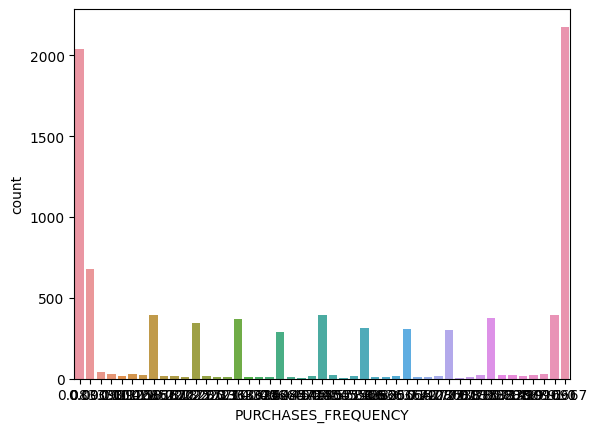

In [ ]:
sns.countplot(x='PURCHASES_FREQUENCY',data=data)

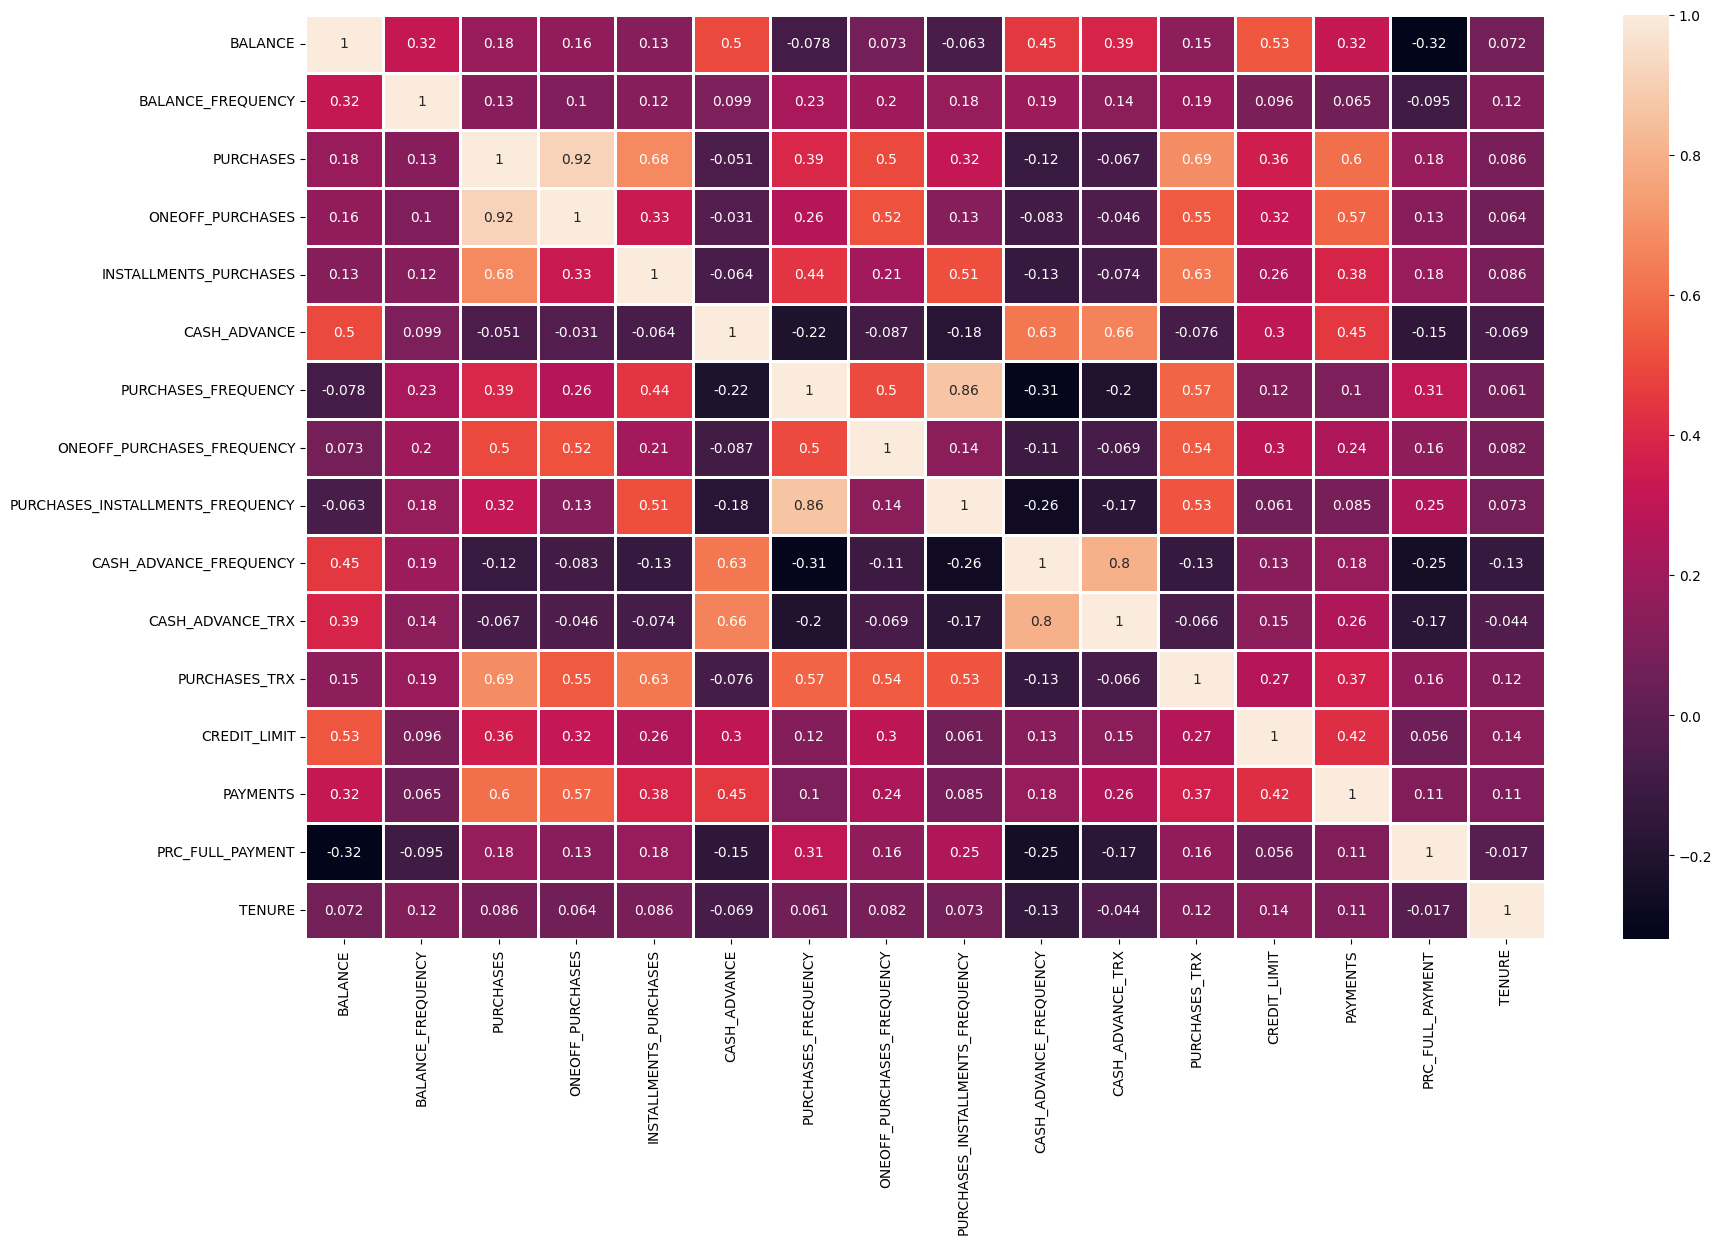

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(data.corr(),annot=True,linewidths=1)
plt.show()

<Axes: xlabel='BALANCE_FREQUENCY', ylabel='count'>

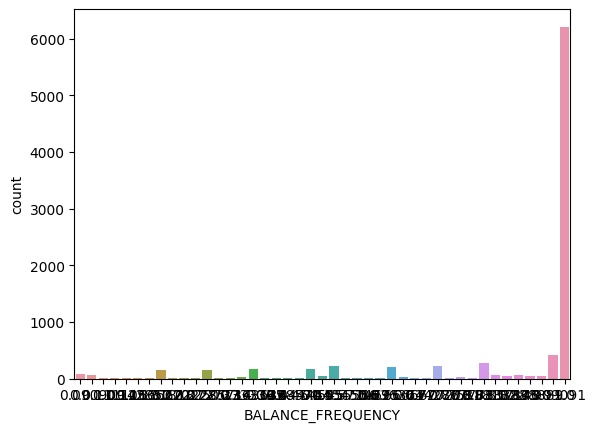

In [ ]:
sns.countplot(x='BALANCE_FREQUENCY',data=data)

In [ ]:
#K-MEANS CLUSTERING
X=data.iloc[:,10:12:]
X

,CASH_ADVANCE_TRX,PURCHASES_TRX
0,0,2
1,4,0
2,0,12
3,1,1
4,0,1
...,...,...
8945,0,6
8946,0,6
8947,0,5
8948,2,0


In [ ]:
#elbow
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,7):
  km=KMeans(n_clusters=i,init='k-means++',random_state=4)
  km.fit(X)
  wcss.append(km.inertia_)

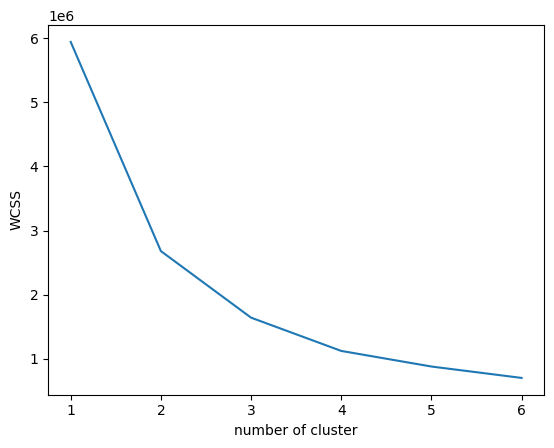

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,7),wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [ ]:
km1=KMeans(n_clusters=2,init='k-means++',random_state=5)
y_kmeans=km1.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

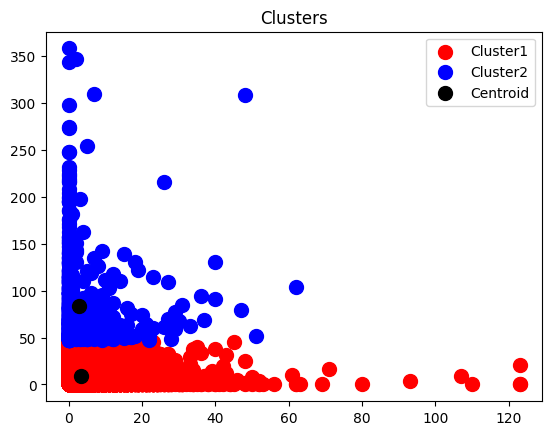

In [ ]:
X=np.array(X)
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s = 100,c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s = 100,c = 'blue', label = 'Cluster2')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid')
plt.title("Clusters")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

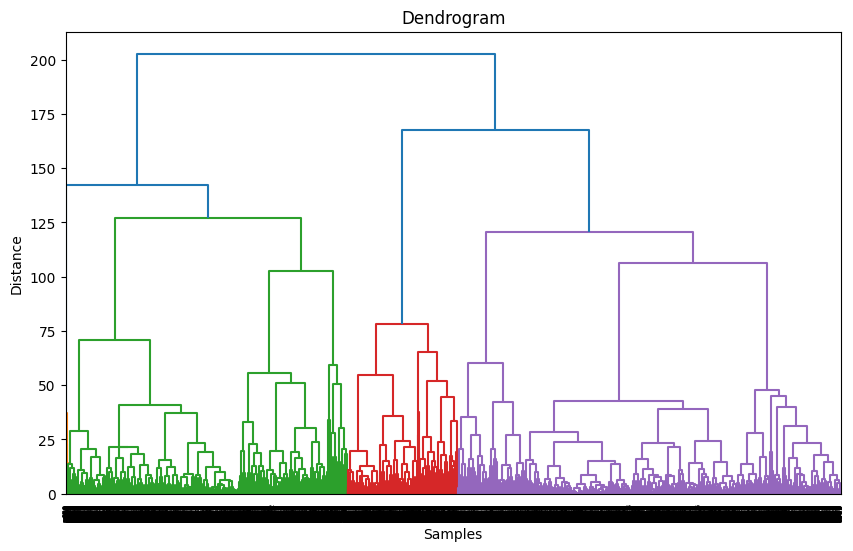

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Initialize the Hierarchical clustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=3)

# Fit the Hierarchical model to the scaled data
hierarchical.fit(scaled_data)

# Get the cluster labels
hierarchical_labels = hierarchical.labels_

In [ ]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the scaled data
dbscan.fit(scaled_data)

# Get the cluster labels (-1 represents outliers)
dbscan_labels = dbscan.labels_

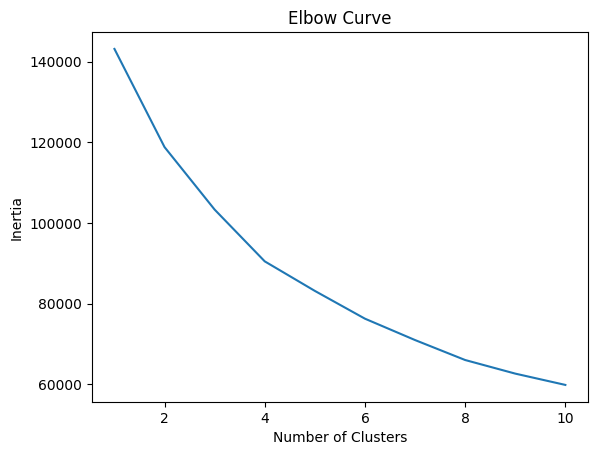

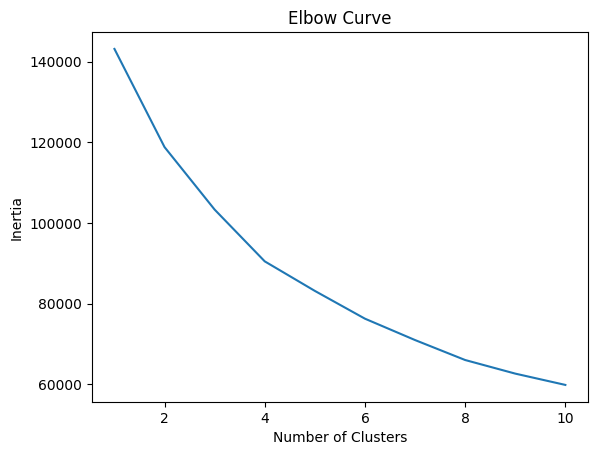

Silhouette Score:
K-means Silhouette Score: 0.20522148500292425
Hierarchical Silhouette Score: 0.17651215021014652
DBScan Silhouette Score: -0.4976462866066918


In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Initialize the K-means clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the K-means model to the scaled data
kmeans.fit(scaled_data)

# Get the cluster labels
kmeans_labels = kmeans.labels_
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Initialize the K-means clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the K-means model to the scaled data
kmeans.fit(scaled_data)

# Get the cluster labels
kmeans_labels = kmeans.labels_
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)

print("Silhouette Score:")
print("K-means Silhouette Score:", kmeans_silhouette)
print("Hierarchical Silhouette Score:", hierarchical_silhouette)
print("DBScan Silhouette Score:", dbscan_silhouette)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy.spatial.distance import cdist

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
%matplotlib inline



In [ ]:
scaler =  RobustScaler().fit(data)
df_scale = scaler.fit_transform(data)
df_scale = pd.DataFrame(df_scale,columns= data.columns)

In [ ]:
# This Method Display Hierachy Method using silhouette_score
def hierachy_plot(df, numk):
    distortions = []
    for k in range(2,numk):
        hac = AgglomerativeClustering(n_clusters=k).fit(df)
        df["hac"] = hac.labels_
        distortions.append(silhouette_score(df.iloc[:,:-1], df["hac"]))

    print(distortions)
    K = range(2, numk)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Hierachy Method using silhouette_score')
    plt.show()

[0.5070332005084551, 0.5024867431753225, 0.4901447596505162, 0.24735062951286058, 0.26355190320503685, 0.26959478129978814, 0.27539949097884286, 0.27744002349719915, 0.25867208690706844, 0.2647065088278185, 0.2670377800082147, 0.26773535466692083, 0.2614757875278752]


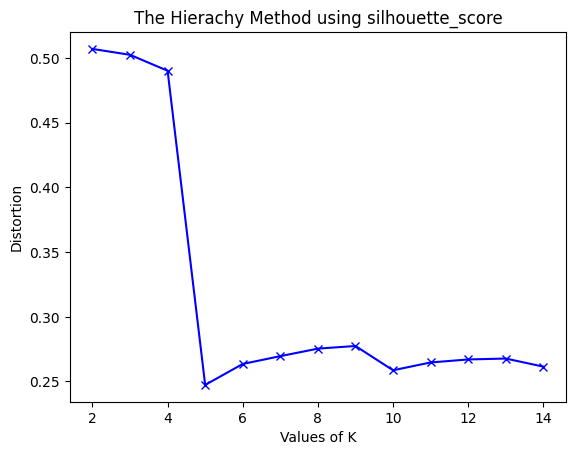

In [ ]:
hierachy_plot(data.iloc[:,:-1], 15)


In [ ]:
# This Method Display GaussianMixture Method using silhouette_score
def GaussianMixture_plot(df, numk):
    distortions = []
    for k in range(2,numk):
        gm = GaussianMixture(k)
        gm.fit(df)
        df["gm"] = gm.predict(df)
        distortions.append(silhouette_score(df.iloc[:,:-1], df["gm"]))
    K = range(2, numk)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The GaussianMixture using silhouette_score')
    plt.show()

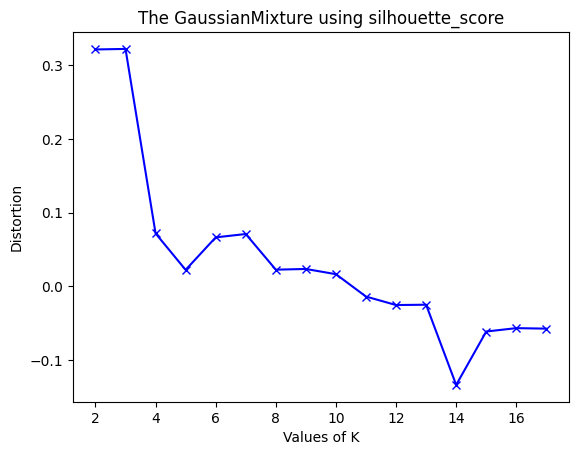

In [ ]:
GaussianMixture_plot(df_scale.iloc[:,:-2], 18)

In [ ]:
#PCA(PRINCIPAL COMPONENT ANALYSIS)
df = df_scale.iloc[:,:-4].copy()

In [ ]:
pca = PCA(n_components=0.99)
principal_comp = pca.fit_transform(df)
principal_comp.shape

(8949, 9)

In [ ]:
principal_comp = pd.DataFrame(principal_comp)
df = principal_comp.copy()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8949, 2)

done complete
done single
done average
done centroid
done ward


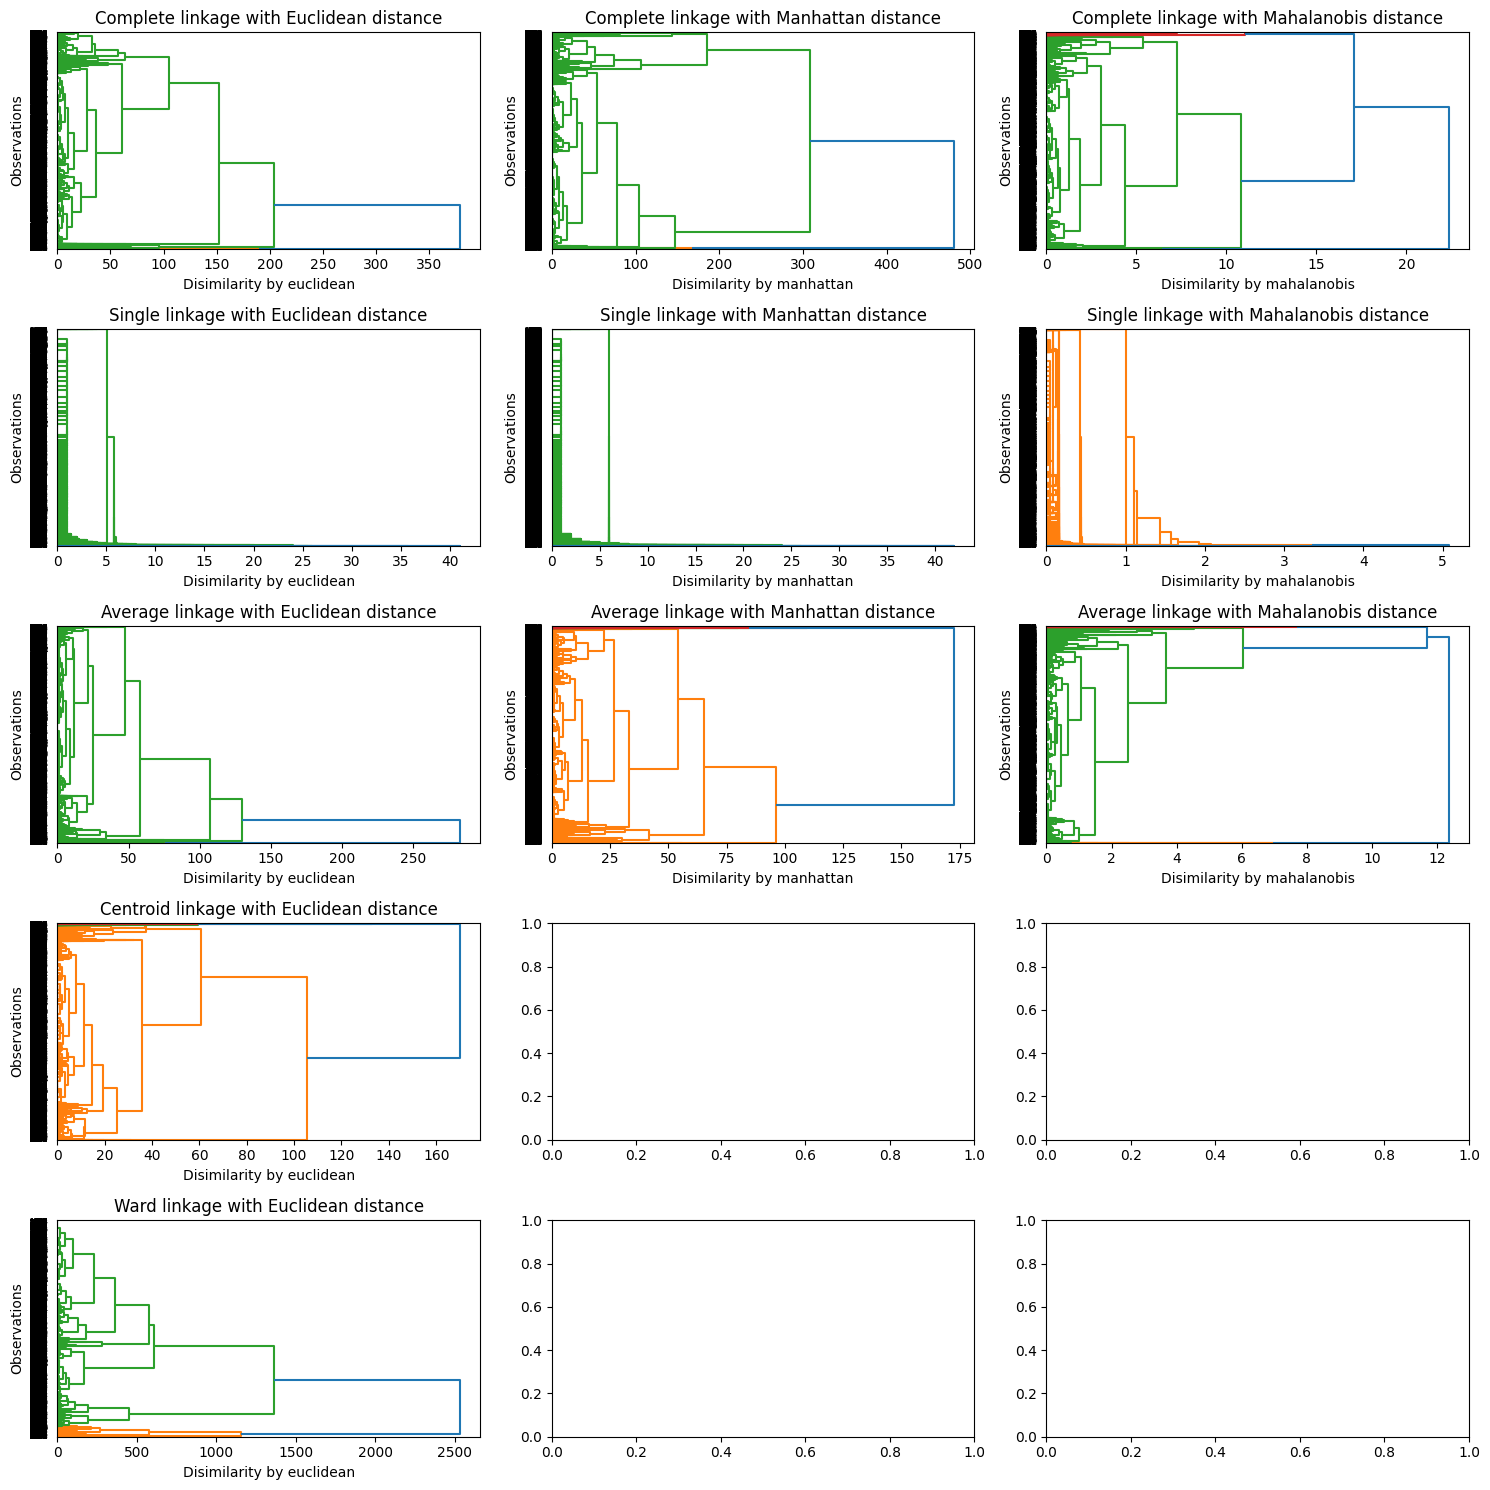

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc



# Drop rows with missing values
data.dropna(inplace=True)



# Set a higher recursion depth limit
import sys
sys.setrecursionlimit(10000)  # Adjust as needed

linkage_criteria = ['complete', 'single', 'average', 'centroid', 'ward']
distance_metrics = ['euclidean', 'cityblock', 'mahalanobis']
distance_functions = ['euclidean', 'manhattan', 'mahalanobis']
fig, axes = plt.subplots(len(linkage_criteria), len(distance_functions), figsize=(15, 15))
for i, linkage in enumerate(linkage_criteria):
    for j, distance in enumerate(distance_metrics):
        if (linkage in ['centroid','ward'] and distance == 'euclidean') or not(linkage in ['centroid','ward']):
            dend = shc.dendrogram(shc.linkage(X, method=linkage, metric=distance), ax=axes[i, j], orientation='right')
            axes[i, j].set_title(f'{linkage.capitalize()} linkage with {distance_functions[j].capitalize()} distance')
            axes[i, j].set_xlabel('Disimilarity by '+ distance_functions[j])
            axes[i, j].set_ylabel('Observations')
    print('done',linkage)
plt.tight_layout()
plt.show()


Original DataFrame:
 (8949, 9)

Shape of Outliers:
 (90, 16)

Filtered DataFrame:
 (8859, 16)


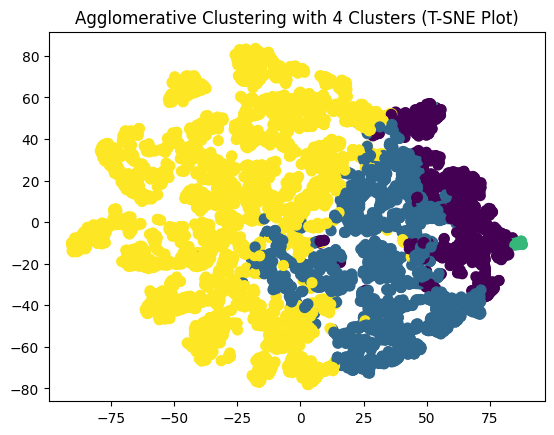

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
hierarchal_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
isof = IsolationForest(contamination=0.01)
df_copy=data.copy()
numrical_df = df_copy.select_dtypes(include=[np.number])
isof.fit(numrical_df)


outliers = isof.predict(numrical_df)
df_without_outliters_isof = pd.DataFrame(numrical_df[outliers == 1], columns=numrical_df.columns)
print("Original DataFrame:\n", df.select_dtypes(include=[np.number]).shape)
print('\nShape of Outliers:\n', numrical_df[outliers == -1].shape)
print("\nFiltered DataFrame:\n", df_without_outliters_isof.shape)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
numrical_df = df_copy.select_dtypes(include=[np.number])
outliers = lof.fit_predict(numrical_df)

df_without_outliers = pd.DataFrame(numrical_df[outliers == 1], columns=numrical_df.columns)
corr_matrix = data.corr()
pca = PCA(n_components=0.99)
pca.fit(df_without_outliers)



df_pca = pd.DataFrame(pca.transform(df_without_outliers), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6'])
X = df_pca.values
y_pred = hierarchal_clustering.fit_predict(X)

# Visualize the results using T-SNE 2D plot
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(df_without_outliers)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, s=50, cmap='viridis')
plt.title('Agglomerative Clustering with 4 Clusters (T-SNE Plot)')
plt.show()

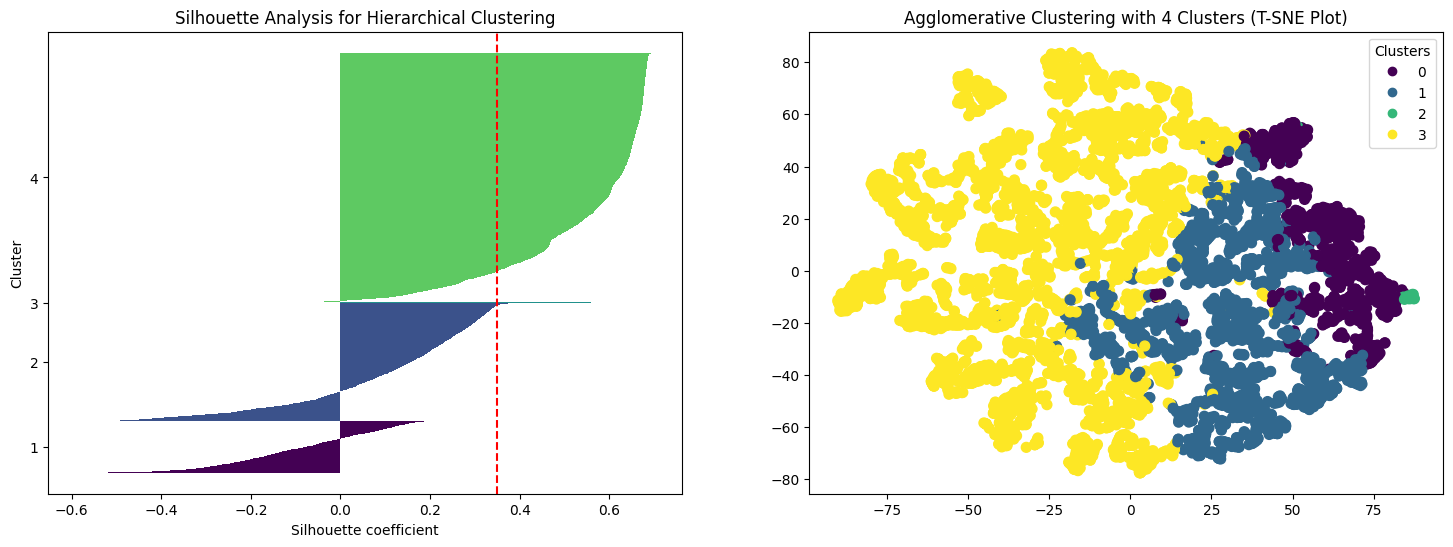

In [ ]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
y_pred = hierarchical_clustering.fit_predict(X)
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X, y_pred)
silhouette_avg = silhouette_score(X, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
cluster_labels = np.unique(y_pred)
n_clusters = cluster_labels.shape[0]
y_lower, y_upper = 0, 0
yticks = []
colors = plt.cm.viridis(cluster_labels.astype(float) / n_clusters)
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_pred == c]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = colors[i]
    ax1.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_lower + y_upper) / 2.)
    y_lower += len(c_silhouette_vals)

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks(yticks)
ax1.set_yticklabels(cluster_labels + 1)
ax1.set_ylabel('Cluster')
ax1.set_xlabel('Silhouette coefficient')
ax1.set_title('Silhouette Analysis for Hierarchical Clustering')


# Visualize the T-SNE scatter plot
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)
scatter = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, s=50, cmap='viridis')
ax2.set_title('Agglomerative Clustering with 4 Clusters (T-SNE Plot)')
legend = ax2.legend(*scatter.legend_elements(), loc="best", title="Clusters")

plt.show()

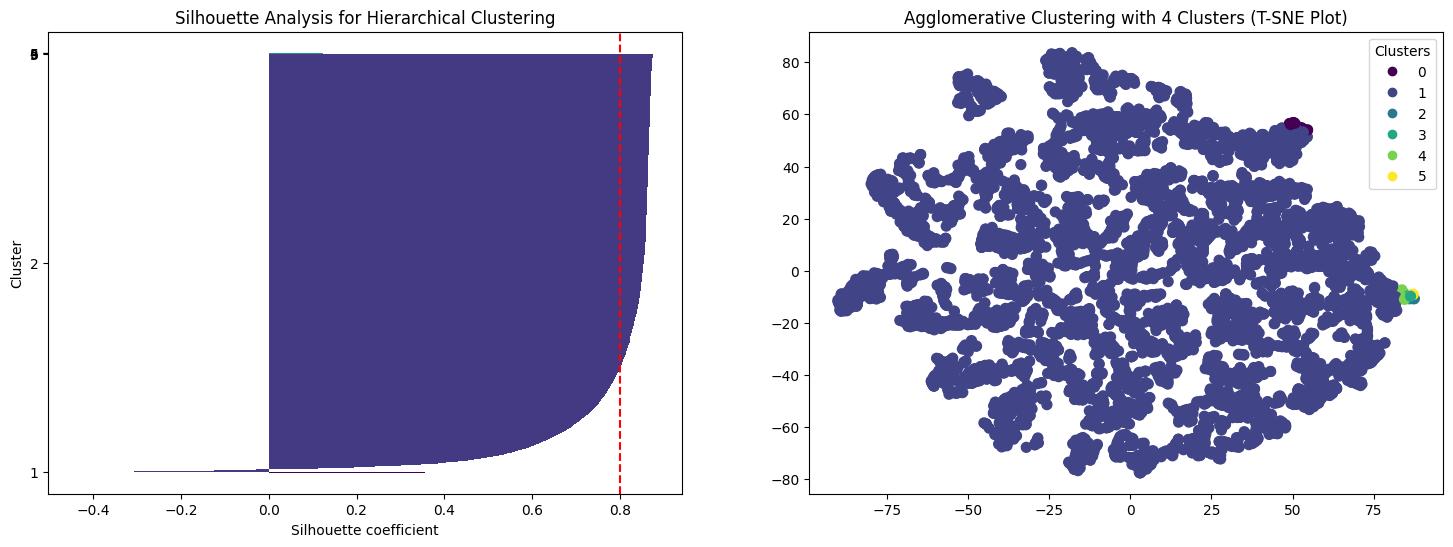

In [ ]:
hierarchal_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='euclidean')
y_pred = hierarchal_clustering.fit_predict(X)

silhouette_vals = silhouette_samples(X, y_pred)
silhouette_avg = silhouette_score(X, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
cluster_labels = np.unique(y_pred)
n_clusters = cluster_labels.shape[0]
y_lower, y_upper = 0, 0
yticks = []
colors = plt.cm.viridis(cluster_labels.astype(float) / n_clusters)
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_pred == c]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = colors[i]
    ax1.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_lower + y_upper) / 2.)
    y_lower += len(c_silhouette_vals)

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks(yticks)
ax1.set_yticklabels(cluster_labels + 1)
ax1.set_ylabel('Cluster')
ax1.set_xlabel('Silhouette coefficient')
ax1.set_title('Silhouette Analysis for Hierarchical Clustering')


# Visualize the T-SNE scatter plot
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)
scatter = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, s=50, cmap='viridis')
ax2.set_title('Agglomerative Clustering with 4 Clusters (T-SNE Plot)')
legend = ax2.legend(*scatter.legend_elements(), loc="best", title="Clusters")

plt.show()